Primeras filas del DataFrame:
                  0        1        2
0          Column1  Column2  Column3
1  GitHub y GitLab      NaN      NaN
2              NaN      NaN      NaN
3           Semana   GitHub   GitLab
4       2019-12-01       14        6
Columnas detectadas: Index(['Semana', 'GitHub', 'GitLab'], dtype='object')
Primeras filas procesadas del DataFrame:
        Semana GitHub GitLab
0  2019-12-01     14      6
1  2019-12-08     12      6
2  2019-12-15     12      6
3  2019-12-22      9      3
4  2019-12-29      8      3


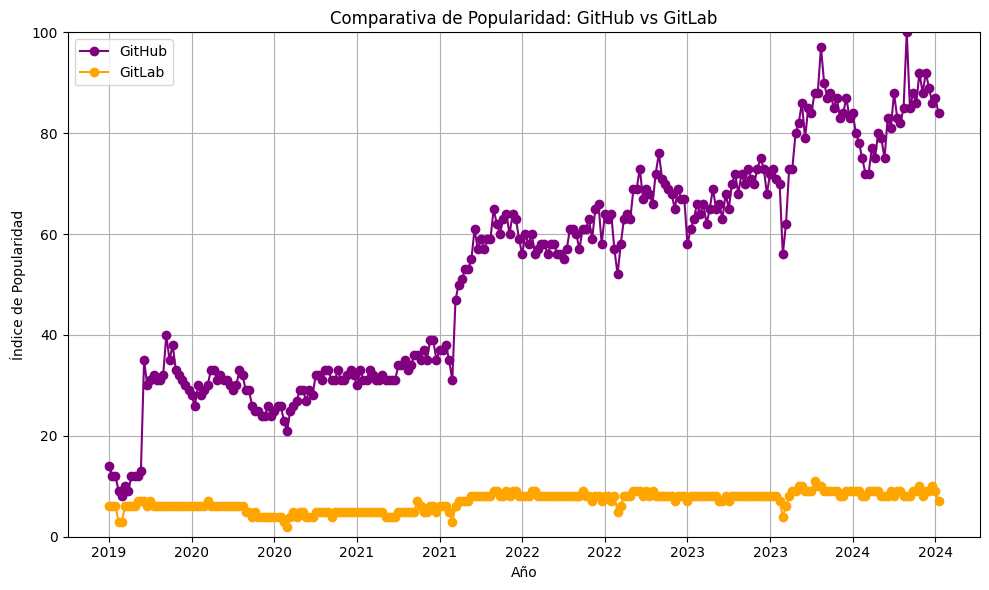

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Ruta del archivo
file_path = "D:/Documents/complementario-3125033/06-Sesión/GitHub - GitLab/gitHubGitLab.xlsx"

# Leer el archivo completo
data = pd.read_excel(file_path, header=None)  # No asumimos encabezados, cargamos todo
print("Primeras filas del DataFrame:\n", data.head())  # Verifica cómo se cargaron los datos

# Localizar los encabezados reales
headers_row = data[data.iloc[:, 0] == "Semana"].index[0]  # Encuentra la fila donde empieza "Semana"
data.columns = data.iloc[headers_row]  # Usa esa fila como nombres de columna
data = data[headers_row + 1:].reset_index(drop=True)  # Filtra los datos por debajo de los encabezados
data.columns.name = None  # Limpia el nombre del índice de columnas

# Verificar los nombres finales de las columnas
print("Columnas detectadas:", data.columns)
print("Primeras filas procesadas del DataFrame:\n", data.head())

# Extraer columnas relevantes
semanas = pd.to_datetime(data['Semana'], errors='coerce')  # Convertir la columna 'Semana' a datetime
gitHub = pd.to_numeric(data['GitHub'], errors='coerce')  # Aseguramos conversión numérica
gitLab = pd.to_numeric(data['GitLab'], errors='coerce')

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(semanas, gitHub, label='GitHub', color='purple', marker='o')
plt.plot(semanas, gitLab, label='GitLab', color='orange', marker='o')

# Personalización del gráfico
plt.ylim(0, 100)
plt.xticks(semanas[::len(semanas)//10], [str(year) for year in semanas.dt.year[::len(semanas)//10]])  # Ajustar las etiquetas de años
plt.xlabel('Año')
plt.ylabel('Índice de Popularidad')
plt.title('Comparativa de Popularidad: GitHub vs GitLab')
plt.legend()
plt.grid()

# Mover la leyenda al lado izquierdo
plt.legend(loc='upper left')  # Aquí se especifica la ubicación de la leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()